#Regressão Linear

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale

boston = load_boston()
X, y = scale(boston.data), boston.target

In [3]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 
regression.fit(X, y)

LinearRegression()

In [4]:
"""
Agora que o algoritmo está instalado, você pode usar o método de 
pontuação para relatar a medida R2:
"""
print(f'R2 {regression.score(X, y):.3f}')

R2 0.741


In [5]:
elementos = [a + ':' + str(round(b, 1)) for a, b in zip(boston.feature_names, regression.coef_)]

for elemento in elementos:
  print(elemento)

CRIM:-0.9
ZN:1.1
INDUS:0.1
CHAS:0.7
NOX:-2.1
RM:2.7
AGE:0.0
DIS:-3.1
RAD:2.7
TAX:-2.1
PTRATIO:-2.1
B:0.8
LSTAT:-3.7


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# ONE HOT ENCODER VS LABEL ENCODER
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
enc = OneHotEncoder()
qualitativo = ['vermelho', 'vermelho', 'verde', 'azul',
 'vermelho', 'azul', 'azul', 'verde']
labels = lbl.fit_transform(qualitativo).reshape(8,1)
print(labels)
print()
print("Vermelho = 2\nVerde = 1\nAzul = 0")
print()
print(enc.fit_transform(labels).toarray())

[[2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]]

Vermelho = 2
Verde = 1
Azul = 0

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [8]:
from sklearn.preprocessing import PolynomialFeatures
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

In [9]:
"""
O exemplo python a seguir usa o conjunto de dados de Boston para verificar 
a eficácia da técnica. Se for bem-sucedida, a expansão polinômial pegará 
relações não lineares em dados que requerem uma curva, não uma linha, 
para prever corretamente e superar qualquer dificuldade de previsão em 
detrimento de um número crescente de preditores.
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score

Polinomial = PolynomialFeatures(degree=2)
Polinomial_X = Polinomial.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Polinomial_X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import Ridge
regressao = Ridge(alpha=0.1, normalize=True)
regressao.fit(X_train,y_train)
print(f'R2: {r2_score(y_test,regressao.predict(X_test)):.3f}')

R2: 0.820


In [10]:
"""
Uma solução para um problema envolvendo uma resposta binária
(o modelo tem que escolher entre duas classes possíveis) 
seria codificar um vetor de resposta como uma sequência de uns e zeros 
(ou valores positivos e negativos). 
O seguinte código Python prova a viabilidade e os limites do uso
de uma resposta binária:
"""
import numpy as np 
a = np.array([0, 0, 0, 0, 1, 1, 1, 1]) 
b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(8,1) 
from sklearn.linear_model import LinearRegression 
regressao = LinearRegression() 
regressao.fit(b,a) 
print (regressao.predict(b)>0.5) 

[False False False False  True  True  True  True]


In [11]:
"""
A regressão logística é a mesma que uma regressão linear, 
exceto que os dados y contêm números inteiros indicando a classe 
em relação à observação. Assim, usando o conjunto de dados de Boston 
a partir do módulo de conjuntos de dados Scikit-learn, você pode tentar 
adivinhar o que torna as casas em uma área excessivamente cara
(valores medianos >= 40):
"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,binary_y, test_size=0.33, random_state=5)

logistic = LogisticRegression()
logistic.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print(f'Treinamento: {accuracy_score(y_train, logistic.predict(X_train)):.3f}')
print(f'Teste:{accuracy_score(y_test, logistic.predict(X_test)):.3f}')

Treinamento: 0.979
Teste:0.958


In [12]:
"""
O exemplo divide os dados em conjuntos de treinamento e teste, permitindo 
verificar a eficácia do modelo de regressão logística em dados que o modelo 
não usou para aprender. Os coeficientes resultantes dizem a probabilidade de uma
 determinada classe estar na classe-alvo
 (que é qualquer classe codificada usando um valor de 1). 
 Se um coeficiente aumentar a probabilidade, terá um coeficiente positivo; 
 caso contrário, o coeficiente é negativo.
"""
for var,coef in zip(boston.feature_names,
 logistic.coef_[0]):
 print (f"{var} : {coef:.3f}")

CRIM : 0.086
ZN : 0.230
INDUS : 0.580
CHAS : -0.029
NOX : -0.304
RM : 1.769
AGE : -0.127
DIS : -0.539
RAD : 0.919
TAX : -0.165
PTRATIO : -0.782
B : 0.077
LSTAT : -1.628


In [13]:
"""
Lendo os resultados na sua tela, você pode ver que em Boston, a criminalidade (CRIM)
 tem algum efeito sobre os preços. No entanto, o nível de pobreza (LSTAT), 
 a distância do trabalho (DIS) e a poluição (NOX) têm efeitos muito maiores. 
 Além disso, ao contrário da regressão linear, a regressão logística não produz 
 simplesmente a classe resultante (neste caso um 1 ou um 0), mas também estima a 
 probabilidade de a observação fazer parte de uma das duas classes:
"""
print('\nclasses:',logistic.classes_)
print('\nProbs:\n',logistic.predict_proba(X_test)[:3,:])


classes: [0 1]

Probs:
 [[0.33234217 0.66765783]
 [0.97060356 0.02939644]
 [0.99594746 0.00405254]]


In [14]:
"""
A menos que você use validação cruzada, medidas de erro como R2 podem ser enganosas
porque o número de features pode facilmente inflar, mesmo que a feature não contenha 
informações relevantes. O exemplo a seguir mostra o que acontece com o R2 quando você 
adiciona apenas features aleatórias:
"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
check = [2**i for i in range(8)]

for i in range(2**7+1):
  X_train = np.column_stack((X_train,np.random.random(X_train.shape[0])))
  X_test = np.column_stack((X_test,np.random.random(X_test.shape[0])))
  regressao.fit(X_train, y_train)
  
  if i in check:
    print (f"Random features: {i} -> R2: {r2_score(y_train,regressao.predict(X_train)):.3f}")

Random features: 1 -> R2: 0.739
Random features: 2 -> R2: 0.740
Random features: 4 -> R2: 0.740
Random features: 8 -> R2: 0.740
Random features: 16 -> R2: 0.748
Random features: 32 -> R2: 0.754
Random features: 64 -> R2: 0.773
Random features: 128 -> R2: 0.824


In [15]:
"""
O que parece ser uma capacidade preditiva aumentada é apenas uma ilusão. Você pode revelar o que aconteceu verificando o conjunto de testes e descobrindo que o desempenho do modelo diminuiu:
a)Observe que o resultado R2 pode mudar de execução
b)devido à natureza aleatória do experimento R2 0.474
"""

regressao.fit(X_train, y_train)
print(f'R2 {r2_score(y_test,regression.predict(X_test)):.3f}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 142)

In [16]:
"""
O exemplo a seguir modifica o exemplo de expansões polinomiais 
usando a regularização L2 e reduz a influência de coeficientes redundantes 
criados pelo procedimento de expansão:
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import Ridge
reg_regression = Ridge(alpha=0.1, normalize=True)
reg_regression.fit(X_train,y_train)
print (f'R2: {r2_score(y_test,reg_regression.predict(X_test)):.3f}')

R2: 0.820


In [ ]:
"""
Para demonstrar a eficácia do aprendizado fora do núcleo, 
o exemplo a seguir estabelece um breve experimento em Python usando 
regressão e squared_loss como função de custo. Ele se baseia no 
dataset Boston depois de embaralhá-lo e separá-lo em conjuntos de 
treinamento e testes. O exemplo demonstra como os coeficientes beta 
mudam à medida que o algoritmo vê mais exemplos.
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
SGD = SGDRegressor(penalty=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, max_iter=5, tol=None)
power = 17
check = [2**i for i in range(power+1)]

for i in range(400):
 for j in range(X_train.shape[0]):
  SGD.partial_fit(X_train[j,:].reshape(1,13), y_train[j].reshape(1,))
  count = (j+1) + X_train.shape[0] * i
  if count in check:
    R2 = r2_score(y_test,SGD.predict(X_test))
    print (f'Exemplo {count} R2 {R2:.3f} coef:'+' '.join(map( lambda x:'%0.3f' %x, SGD.coef_)))

Lembre-se: Não importa a quantidade de dados, você sempre pode se encaixar em um modelo de regressão linear simples, mas eficaz, usando features de aprendizagem on-line SGD.

# ATIVIDADE PRÁTICA: Linear/Polynomial regression
Com o dataset carregado, crie:
1. Modelo preditivo utilizando Regressão Linear(utilize dataviz+scores como R2)
2. Modelo preditivo utilizando Regressão Polinomial(utilize dataviz+scores como R2)
<br><br>Ao término, através do score R2, comprove cientificamente qual melhor algoritmo para o dataset compartilhado.

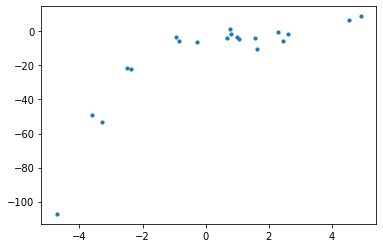

In [0]:
# LIBS
import numpy as np
import matplotlib.pyplot as plt

# DATASET
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# ADICIONAMOS NOVA COLUNA AO INVÉS DE RESHAPE COM NP.NEWAXIS
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# DATAVIZ
plt.scatter(x,y, s=10)
plt.show()

In [0]:
# 1 LINEAR REGRESSION
"""
Dicas modelo preditivo: 
a)importe seu algoritmo Linear Regression, 
b)instancie ele em uma variável, 
c)utilize .fit() para treinar
d) instancie uma variável para .predict()
e) instancie RMSE e R2

Dicas DataViz:
a) Utilize .scatter()
b) Utilize .plot()
c) utilize .show()

Visite as documentações
"""
# importações essenciais:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# 2 POLYNOMIAL REGRESSION
"""
a) instancie a PolynomialFeatures em uma variável 
b) nesta variável, use .fit_transform() para trata-la 
c) instancie seu algoritmo de Regressão Linear em uma variável
d) use o .fit() para treina-lo 
e) instancie em uma variável o .predict()
f) instancie RMSE e R2
g) utilize .scatter(), .plot() e .show() para dataviz

Visite as documentações
"""

# importações essenciais:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures